In [1]:
!pip uninstall transformers
!pip install transformers==3.2.0
!pip install transformers[sentencepiece]
!pip install sentencepiece
!pip install datasets

Found existing installation: transformers 4.35.2
Uninstalling transformers-4.35.2:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.35.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? y
  Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.4 MB/s eta 0:00:00
y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 68.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subpr

In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-large')
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [3]:
dataset = load_dataset("tasksource/bigbench", "sports_understanding")
test_data = dataset['validation']

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for tasksource/bigbench contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tasksource/bigbench
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [4]:
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-large')

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
example_indices = [40, 100]
dash_line = '-'.join('' for x in range(100))

for i, index in enumerate(example_indices):
    print(dash_line)
    print('Example ', i + 1)
    print(dash_line)
    print('INPUT:')
    print(dataset['validation'][index]['inputs'])
    print(dash_line)
    print('Target:')
    print(dataset['validation'][index]['targets'])
    print(dash_line)
    print()

---------------------------------------------------------------------------------------------------
Example  1
---------------------------------------------------------------------------------------------------
INPUT:
Determine whether the following statement or statements are plausible or implausible:
Statement: Victor Wanyama took a left footed shot
Plausible/implausible?
---------------------------------------------------------------------------------------------------
Target:
['plausible']
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------
Example  2
---------------------------------------------------------------------------------------------------
INPUT:
Determine whether the following statement or statements are plausible or implausible:
Statement: Bryce Harper hit a double in the American League Championship Series
Plausible/implau

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#zero_shot

In [13]:
prompts = []
targets = []
outputs = []
for data in dataset['validation']:
    input = tokenizer.encode(data["inputs"], return_tensors="pt").to(device)
    output = tokenizer.decode(model.generate(input,max_new_tokens=50)[0], skip_special_tokens=True)

    prompts.append(data["inputs"])
    targets.append(data["targets"][0])
    outputs.append(output)

df_answer_only = pd.DataFrame({
    'prompt': prompts,
    'target': targets,
    'model_output': outputs
})

df_answer_only.to_csv('results_answer_only.csv', index=False)
accuracy_answer_only = accuracy_score(targets,outputs)
print(accuracy_answer_only)

0.5989847715736041


#3-shot

In [14]:
def make_prompt(examples, sample):
    prompt = ''
    for index in examples:
        inputs = dataset['train'][index]['inputs']
        targets = dataset['train'][index]['targets'][0]
        prompt += f"""
inputs:
{inputs}
answer:
{targets}
"""

    inputs = dataset['validation'][sample]['inputs']

    prompt += f"""
inputs:
{inputs}
answer:
"""
    return prompt
prompt = print(make_prompt([30, 110, 150], 10))


inputs:
Determine whether the following statement or statements are plausible or implausible:
Statement: Chris Godwin walked to first base
Plausible/implausible?
answer:
implausible

inputs:
Determine whether the following statement or statements are plausible or implausible:
Statement: Tristan Jarry dunked the ball
Plausible/implausible?
answer:
implausible

inputs:
Determine whether the following statement or statements are plausible or implausible:
Statement: Nelson Cruz was out at first
Plausible/implausible?
answer:
plausible

inputs:
Determine whether the following statement or statements are plausible or implausible:
Statement: Igor Shesterkin launched a hail mary
Plausible/implausible?
answer:



In [15]:
prompts = []
targets = []
outputs = []
#To-do the problem of is using train data as prompt
for i, data in enumerate(dataset['validation']):
    if 191> i >5 :
      prompt = make_prompt([i+5, i+4, i-5], i)
    else:
      prompt = make_prompt([30, 110, 150], i)
    input = tokenizer.encode(prompt, return_tensors="pt").to(device)
    output = tokenizer.decode(model.generate(input,max_new_tokens=50)[0], skip_special_tokens=True)

    prompts.append(prompt)
    targets.append(data["targets"][0])
    outputs.append(output)

df_3_shot = pd.DataFrame({
    'prompt': prompts,
    'target': targets,
    'model_output': outputs
})

df_3_shot.to_csv('results_3_shot.csv', index=False)
accuracy_3_shot = accuracy_score(targets,outputs)
print(accuracy_3_shot)

0.5380710659898477


#chain-of-thought

In [ ]:
inputs = dataset['train'][10]['inputs']
targets = dataset['train'][10]['targets'][0]
print(inputs, targets)

Determine whether the following statement or statements are plausible or implausible:
Statement: Baker Mayfield hit nothing but net
Plausible/implausible? implausible


In [5]:
def make_prompt(sample):
    prompt = ''
    prompt += f"""
Answer the following Plausible/implausible question by reasoning step-by-step.
inputs:
{dataset['train'][10]['inputs']}
answer:
Let’s think step by step
No one can hit net.So the answer is {dataset['train'][10]['targets'][0]}
"""
    inputs = dataset['validation'][sample]['inputs']
    prompt += f"""
Answer the following Plausible/implausible question by reasoning step-by-step.
inputs:
{inputs}
answer:
Let’s think step by step

"""
    return prompt
prompt = print(make_prompt(12))


Answer the following Plausible/implausible question by reasoning step-by-step.
inputs:
Determine whether the following statement or statements are plausible or implausible:
Statement: Baker Mayfield hit nothing but net
Plausible/implausible?
answer:
Let’s think step by step
No one can hit net.So the answer is implausible

Answer the following Plausible/implausible question by reasoning step-by-step.
inputs:
Determine whether the following statement or statements are plausible or implausible:
Statement: Malcolm Brogdon ran out of bounds
Plausible/implausible?
answer:
Let’s think step by step




In [ ]:
prompts = []
targets = []
outputs = []
answers = []

for i, data in enumerate(dataset['validation']):
    prompt = make_prompt(i)
    input = tokenizer.encode(prompt, return_tensors="pt").to(device)
    output = tokenizer.decode(model.generate(input,max_new_tokens=50)[0], skip_special_tokens=True)
    words = output.split()

    prompts.append(prompt)
    targets.append(data["targets"][0])
    outputs.append(output)
    answers.append(words[-1].replace(".", ""))
    # print(f'prompot:{prompt}\n{dash_line}\ntarget:{data["targets"][0]}\nanswer:{words[-1].replace(".", "")}\n{dash_line}\noutput:{output}')

In [8]:
df_COT = pd.DataFrame({
    'prompt': prompts,
    'target': targets,
    'model_output': outputs,
    'model_answer':answers
})

df_COT.to_csv('results_COT_with_example.csv', index=False)
accuracy_COT_with_example = accuracy_score(targets,answers)
print(accuracy_COT_with_example)

0.5786802030456852


In [ ]:
def make_prompt(sample):
    prompt = ''
    inputs = dataset['validation'][sample]['inputs']
    prompt += f"""
Answer the following Plausible/implausible question by reasoning step-by-step.
inputs:
{inputs}
answer:
Let’s think step by step

"""
    return prompt
prompts = []
targets = []
outputs = []
answers = []

for i, data in enumerate(dataset['validation']):
    prompt = make_prompt(i)
    input = tokenizer.encode(prompt, return_tensors="pt").to(device)
    output = tokenizer.decode(model.generate(input,max_new_tokens=50)[0], skip_special_tokens=True)
    words = output.split()

    prompts.append(prompt)
    targets.append(data["targets"][0])
    outputs.append(output)
    answers.append(words[-1].replace(".", ""))
    # print(f'prompot:{prompt}\n{dash_line}\ntarget:{data["targets"][0]}\nanswer:{words[-1].replace(".", "")}\n{dash_line}\noutput:{output}')

df_COT = pd.DataFrame({
    'prompt': prompts,
    'target': targets,
    'model_output': outputs,
    'model_answer':answers
})

In [12]:
df_COT.to_csv('results_COT.csv', index=False)
accuracy_COT = accuracy_score(targets,answers)
print(accuracy_COT)

0.5685279187817259


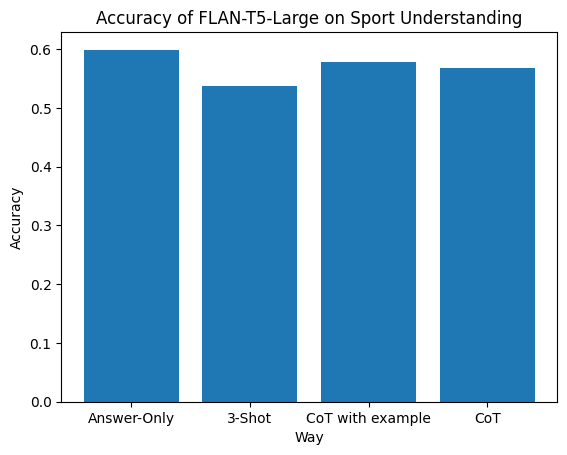

In [17]:
# Plot the accuracy of each way
labels = ['Answer-Only', '3-Shot', 'CoT with example','CoT']
accuracy = [accuracy_answer_only, accuracy_3_shot, accuracy_COT_with_example, accuracy_COT]
plt.bar(labels, accuracy)
plt.title('Accuracy of FLAN-T5-Large on Sport Understanding')
plt.xlabel('Way')
plt.ylabel('Accuracy')
plt.show()